# <center>⚡️🏁 Quick start - тестируем простое решение</center>

In [5]:
pip install numpy pandas catboost -q


Note: you may need to restart the kernel to use updated packages.


In [64]:
import numpy as np
import pandas as pd
from zipfile import ZipFile

## Анализируем данные о машинах car_info

🚗 Главное описание машин с информацией о поломках для обучения / прогноза - `car_train.csv` / `car_test.csv`.

**Пояснение столбцов:**
- `car_id` - идентификатор машины
- `model` / `car_type` / `fuel_type`- марка, класс и тип топлива машины
- `car_rating` / `riders` - общий рейтинг  и общее число поездок к концу 2021-го кода.
- `year_to_start` / `year_to_work` - года выпуска машины и начала работы в автопарке 
- `target_reg` - количество дней до поломки.
- `target_class` - класс поломки (всего 9 видов)

In [65]:
with ZipFile('data/competative-data-science-course-by-data-feeling.zip') as zip_file:
    zip_file.extractall("data")

(2337, 10)


,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class
616,y19652944A,Smart ForFour,economy,petrol,1.92,2015,80035,2015,3475.91,engine_ignition
1868,Y11727925P,Renault Sandero,standart,petrol,4.00,2013,43063,2022,1187.82,break_bug
1678,d21227181g,Smart ForFour,economy,petrol,4.16,2016,103879,2020,5259.08,engine_check


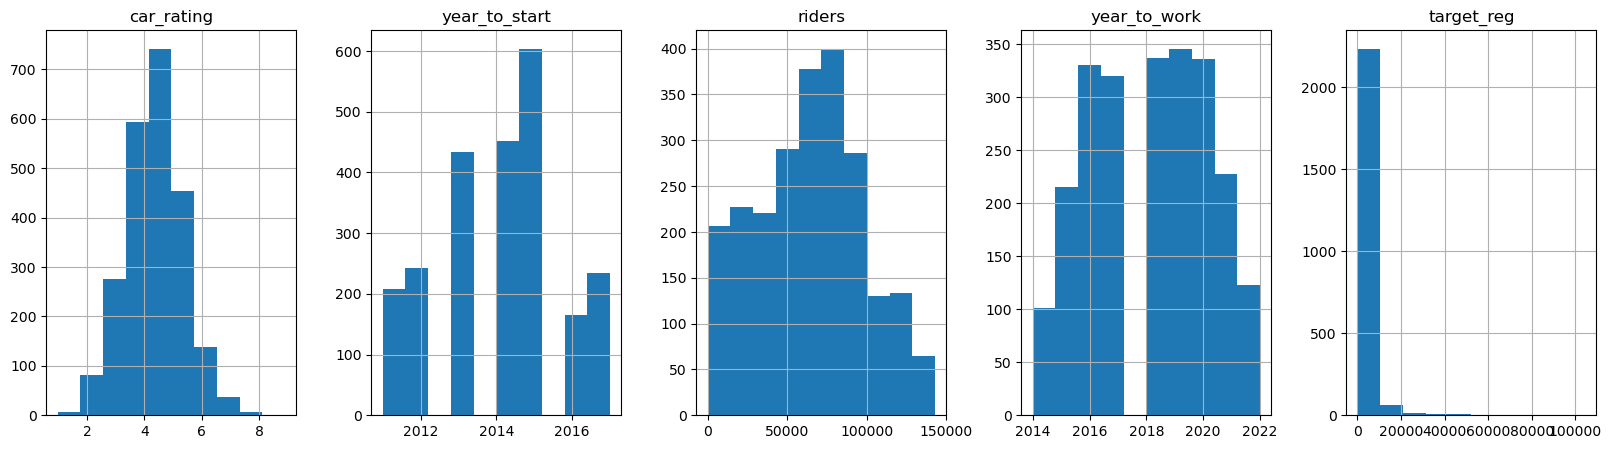

In [66]:
train = pd.read_csv("data/car_train.csv")
print(train.shape)
train.hist(figsize=(20, 5), layout = (-1, 5))
train.sample(3)

In [67]:
train.describe()

,car_rating,year_to_start,riders,year_to_work,target_reg
count,2337.000000,2337.000000,2337.000000,2337.000000,2337.000000
mean,4.354292,2014.040650,63711.443731,2018.069748,3824.600745
std,0.996954,1.685852,33755.012096,2.159484,6171.887272
min,0.980000,2011.000000,23.000000,2014.000000,225.540000
25%,3.740000,2013.000000,41053.000000,2016.000000,1215.790000
50%,4.360000,2014.000000,64415.000000,2018.000000,2352.100000
75%,5.000000,2015.000000,86515.000000,2020.000000,4334.850000
max,8.900000,2017.000000,142862.000000,2022.000000,104377.420000


In [68]:
test = pd.read_csv("data/car_test.csv")
print(test.shape)
test.sample(3)

(1913, 8)


,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work
17,A22674788w,VW Polo,economy,petrol,4.40,2011,2760,2021
1565,d-5916656a,Skoda Rapid,economy,petrol,4.28,2017,118785,2020
382,f16848135A,Smart ForFour,economy,petrol,3.36,2015,85282,2021


## Классифицируем признаки на типы

In [69]:
features2drop = ['car_id'] # то что надо выбросить 
targets = ['target_class', 'target_reg'] # таргеты
cat_features = ['car_type', 'fuel_type', 'model'] # категориальные признаки

filtered_features = [i for i in train.columns if (i not in targets and i not in features2drop)]
num_features = [i for i in filtered_features if i not in cat_features]

print(f"cat_features = {len(cat_features)}:\n{cat_features}\n")
print(f"num_features = {len(num_features)}:\n{num_features}\n")
print(f"targets = {len(targets)}:\n{targets}")

cat_features = 3:
['car_type', 'fuel_type', 'model']

num_features = 4:
['car_rating', 'year_to_start', 'riders', 'year_to_work']

targets = 2:
['target_class', 'target_reg']


## Обучаем Catboost и делаем прогноз на тест

In [70]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #, mean_squared_error

In [71]:
X = train[filtered_features].drop(targets, axis=1, errors='ignore')
y = train['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = CatBoostClassifier(cat_features=cat_features)


clf.fit(X_train, y_train, 
          eval_set=(X_test, y_test),
          verbose=150, plot=False)

# инференс модели
y_pred = clf.predict(X_test)
print(f'\n Accuracy: {accuracy_score(y_test, y_pred)}')

Learning rate set to 0.109335
0:	learn: 2.1911361	test: 2.1951349	best: 2.1951349 (0)	total: 35.1ms	remaining: 35s
150:	learn: 1.6539682	test: 2.2440578	best: 2.1908935 (6)	total: 6.41s	remaining: 36s
300:	learn: 1.2455381	test: 2.3306861	best: 2.1908935 (6)	total: 13.4s	remaining: 31.1s
450:	learn: 0.9655173	test: 2.4024298	best: 2.1908935 (6)	total: 20.5s	remaining: 24.9s
600:	learn: 0.7488971	test: 2.4913589	best: 2.1908935 (6)	total: 27.2s	remaining: 18.1s
750:	learn: 0.5826318	test: 2.5762847	best: 2.1908935 (6)	total: 34s	remaining: 11.3s
900:	learn: 0.4643456	test: 2.6651694	best: 2.1908935 (6)	total: 40.5s	remaining: 4.45s
999:	learn: 0.4027101	test: 2.7091668	best: 2.1908935 (6)	total: 44.9s	remaining: 0us

bestTest = 2.19089351
bestIteration = 6

Shrink model to first 7 iterations.

 Accuracy: 0.0876068376068376


In [72]:
test['target_class'] = clf.predict(test[filtered_features]).ravel()
test[['car_id', 'target_class']].to_csv('subs/simple_baseline_v1.csv', index=False)
print('CSV file saved!')

CSV file saved!


## Добавим информацию про поездки из rides_info


🏇 Информация про поездки - `rides_info.csv`.  **Пояснение столбцов:**
- `user_id` / `car_id` / `ride_id` - идентификаторы водителя, машины, поездки соответственно
- `ride_date` / `rating` - дата поездки и рейтинг, поставленный водителем 
- `ride_duration` / `distance` / `ride_cost` -  длительность (время),  пройденное расстояние, стоимость поездки 
- `speed_avg` / `speed_max` - средняя и максимальная скорости поездки соответственно
- `stop_times` / `refueling` - количество остановок (паузы) и флаг - была ли дозаправка.
- `user_ride_quality` - оценка манеры вождения машины водителя, определенная скоринговой ML системой сервиса.
- `deviation_normal` - общий показатель датчиков о состоянии машины, относительно эталонных показателей (нормы). 


In [80]:
rides = pd.read_csv("data/rides_info.csv")
rides.sample(5)

,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal
470765,k17405422x,h-2287342p,k1q,2020-02-20,5.58,13,123,31,47.636147,1,204.187603,0,12.336386,-21.206
265628,N84854461E,S11905138M,O1Y,2020-02-25,4.42,20,394,64,101.596552,0,1295.308687,0,-2.358990,27.662
343661,x22208978F,Y19585916c,U1X,2020-01-07,7.40,48,763,69,92.524288,0,3415.294018,0,-0.544226,-8.813
390402,K72037321P,b15147844G,Y1V,2020-03-04,6.13,35,414,34,129.000000,1,1230.091541,0,-4.656408,1.987
175106,o16244173J,M14830267a,c1F,2020-02-02,5.17,83,2484,39,72.000000,2,730.293728,0,-6.443049,-60.739


In [81]:
f = lambda x: x.nunique()
rides_df_gr = rides.groupby('car_id', as_index=False).agg(mean_rating = ('rating', 'mean'),
                                                   distance_sum = ('distance', 'sum'),
                                                   rating_min = ('rating', 'min'),
                                                   speed_max = ('speed_max', 'max'),
                                                   user_ride_quality_median = ('user_ride_quality', 'median'), 
                                                   deviation_normal_count = ('deviation_normal', 'count'),
                                                   user_uniq = ('user_id', f))


rides_df_gr.head(2)

,car_id,mean_rating,distance_sum,rating_min,speed_max,user_ride_quality_median,deviation_normal_count,user_uniq
0,A-1049127W,4.255172,1.125753e+07,0.1,179.729652,-0.288229,174,172
1,A-1079539w,4.088046,1.912765e+07,0.1,184.505566,2.508746,174,173


In [82]:
def add_featues(df):
    
    if 'mean_rating' not in df.columns:
        return df.merge(rides_df_gr, on = 'car_id', how = 'left')
    
    return df
    
    
train = add_featues(train)
test = add_featues(test)

In [83]:
train.sample(2)

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class,mean_rating,distance_sum,rating_min,speed_max,user_ride_quality_median,deviation_normal_count,user_uniq
217,R-1442786V,VW Polo VI,economy,petrol,4.36,2011,7998,2020,4461.76,engine_check,4.744885,2.231708e+07,0.20,170.096181,-7.963668,174,172
1280,v-2285960e,Kia Rio,economy,petrol,4.30,2015,81235,2015,1333.88,engine_check,4.763161,1.570946e+07,0.19,157.000000,-30.270738,174,172


In [84]:
train.to_csv('tmp_data/quickstart_train.csv', index=False)

In [85]:
test.to_csv('tmp_data/quickstart_test.csv', index=False)

# Снова обновляем типы фичей

In [86]:
filtered_features = [i for i in train.columns if (i not in targets and i not in features2drop)]
num_features = [i for i in filtered_features if i not in cat_features]


print(f"cat_features = {len(cat_features)}:\n{cat_features}\n")
print(f"num_features = {len(num_features)}:\n{num_features}\n")
print(f"targets = {len(targets)}:\n{targets}")

cat_features = 3:
['car_type', 'fuel_type', 'model']

num_features = 11:
['car_rating', 'year_to_start', 'riders', 'year_to_work', 'mean_rating', 'distance_sum', 'rating_min', 'speed_max', 'user_ride_quality_median', 'deviation_normal_count', 'user_uniq']

targets = 2:
['target_class', 'target_reg']


# Обучаем Catboost на новых данных и делаем новый прогноз

In [87]:
X = train[filtered_features].drop(targets, axis=1, errors='ignore')
y = train['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = CatBoostClassifier(cat_features=cat_features)


clf.fit(X_train, y_train, 
          eval_set=(X_test, y_test),
          verbose=150, plot=False)

# инференс модели
y_pred = clf.predict(X_test)
print(f'\n Accuracy: {accuracy_score(y_test, y_pred)}')

Learning rate set to 0.109335
0:	learn: 1.8475119	test: 1.8655808	best: 1.8655808 (0)	total: 37.8ms	remaining: 37.7s
150:	learn: 0.3200590	test: 0.5547029	best: 0.5540463 (147)	total: 7.13s	remaining: 40.1s
300:	learn: 0.1971982	test: 0.5615205	best: 0.5513186 (167)	total: 14.4s	remaining: 33.5s
450:	learn: 0.1375334	test: 0.5712868	best: 0.5513186 (167)	total: 21.6s	remaining: 26.3s
600:	learn: 0.0980050	test: 0.5823510	best: 0.5513186 (167)	total: 28.9s	remaining: 19.2s
750:	learn: 0.0738682	test: 0.5989975	best: 0.5513186 (167)	total: 36.1s	remaining: 12s
900:	learn: 0.0569120	test: 0.6151325	best: 0.5513186 (167)	total: 43.5s	remaining: 4.78s
999:	learn: 0.0495492	test: 0.6233229	best: 0.5513186 (167)	total: 48.2s	remaining: 0us

bestTest = 0.5513186112
bestIteration = 167

Shrink model to first 168 iterations.

 Accuracy: 0.782051282051282


In [88]:
fi = clf.get_feature_importance(prettified=True)
fi

,Feature Id,Importances
0,speed_max,36.034645
1,mean_rating,30.903684
2,rating_min,13.938537
3,model,4.206258
4,car_type,3.881288
5,user_uniq,3.035950
6,user_ride_quality_median,2.097702
7,distance_sum,1.614279
8,riders,1.347984
9,car_rating,1.149331


In [89]:
test['target_class'] = clf.predict(test[filtered_features]).ravel()
test[['car_id', 'target_class']].to_csv('subs/simple_baseline_v2.csv', index=False)
print('CSV file saved!')

CSV file saved!


# Что дальше? Зашли решение на Kaggle

- Нажимаем `Save Version`
- Проверяем, что в `Advanced Settings` выбрано - всегда сохранять результаты ноутбука.
- Тип сохранения `Save & Run All (Commit)`
- Жмем окончательно кнопку `Save`